<a href="https://colab.research.google.com/github/danysc/DA-Projects/blob/main/Failed_Bank_List_(Html).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Failed Bank List (Html)

1. The following page describes a list of "Failed Bank List" <br>

https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/

In [44]:
import pandas as pd 
url = "https://www.fdic.gov/resources/resolutions/bank-failures/failed-bank-list/"
bank_list = pd.read_html(url)

2. Load the data into a new DataFrame

In [45]:
df = bank_list[0]
# Show the first 5 rows:
df.loc[:4]

,Bank NameBank,CityCity,StateSt,CertCert,Acquiring InstitutionAI,Closing DateClosing,FundFund
0,Almena State Bank,Almena,KS,15426,Equity Bank,"October 23, 2020",10538
1,First City Bank of Florida,Fort Walton Beach,FL,16748,"United Fidelity Bank, fsb","October 16, 2020",10537
2,The First State Bank,Barboursville,WV,14361,"MVB Bank, Inc.","April 3, 2020",10536
3,Ericson State Bank,Ericson,NE,18265,Farmers and Merchants Bank,"February 14, 2020",10535
4,City National Bank of New Jersey,Newark,NJ,21111,Industrial Bank,"November 1, 2019",10534


Renaming column names

In [46]:
NewColList = ['Bank Name','City','State','Cert','Acquiring Institution-AI','Closing Date','Fund']
df.columns = NewColList
df.tail()

,Bank Name,City,State,Cert,Acquiring Institution-AI,Closing Date,Fund
558,"Superior Bank, FSB",Hinsdale,IL,32646,"Superior Federal, FSB","July 27, 2001",6004
559,Malta National Bank,Malta,OH,6629,North Valley Bank,"May 3, 2001",4648
560,First Alliance Bank & Trust Co.,Manchester,NH,34264,Southern New Hampshire Bank & Trust,"February 2, 2001",4647
561,National State Bank of Metropolis,Metropolis,IL,3815,Banterra Bank of Marion,"December 14, 2000",4646
562,Bank of Honolulu,Honolulu,HI,21029,Bank of the Orient,"October 13, 2000",4645


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 563 entries, 0 to 562
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Bank Name                 563 non-null    object
 1   City                      563 non-null    object
 2   State                     563 non-null    object
 3   Cert                      563 non-null    int64 
 4   Acquiring Institution-AI  563 non-null    object
 5   Closing Date              563 non-null    object
 6   Fund                      563 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 30.9+ KB


In [48]:
df.describe()

,Cert,Fund
count,563.000000,563.000000
mean,31630.271758,10036.875666
std,16443.670177,1115.338358
min,91.000000,4645.000000
25%,20096.500000,10116.500000
50%,32165.000000,10257.000000
75%,35364.000000,10397.500000
max,58701.000000,10538.000000


In [49]:
df['Fund'].max()

10538

** What is the Cert of highest Fund?**

In [50]:
df[df['Fund'] == df['Fund'].max()]

,Bank Name,City,State,Cert,Acquiring Institution-AI,Closing Date,Fund
0,Almena State Bank,Almena,KS,15426,Equity Bank,"October 23, 2020",10538


** What was the average (mean) Fund of all states? **

In [51]:
df.groupby('State').mean()['Fund']

State
AL    10247.142857
AR     8874.500000
AZ     9930.062500
CA    10045.317073
CO    10293.100000
CT     7572.500000
FL    10062.421053
GA    10203.752688
HI     4645.000000
IA    10265.000000
ID    10274.500000
IL    10069.318841
IN    10309.666667
KS    10278.090909
KY    10375.666667
LA     8948.500000
MA    10211.000000
MD    10302.700000
MI     9824.571429
MN    10259.826087
MO    10250.750000
MS    10300.500000
NC    10320.857143
NE    10308.000000
NH     4647.000000
NJ     9793.000000
NM    10253.333333
NV    10167.750000
NY     9079.600000
OH     9008.222222
OK    10353.142857
OR    10148.000000
PA     9768.200000
PR    10300.750000
SC    10346.000000
SD    10081.000000
TN     9633.714286
TX     9799.769231
UT     9531.625000
VA    10342.400000
WA    10257.052632
WI     9856.909091
WV    10275.000000
WY    10080.000000
Name: Fund, dtype: float64

In [52]:
ByState = df.groupby(['State']).sum().head()
ByState['Fund']

State
AL     71730
AR     35498
AZ    158881
CA    411858
CO    102931
Name: Fund, dtype: int64

In [53]:
df.groupby(['State']).count()['Bank Name'].head()

State
AL     7
AR     4
AZ    16
CA    41
CO    10
Name: Bank Name, dtype: int64

## Graphics with seaborn

In [54]:
import seaborn as sns

In [ ]:
# sns.pairplot(df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


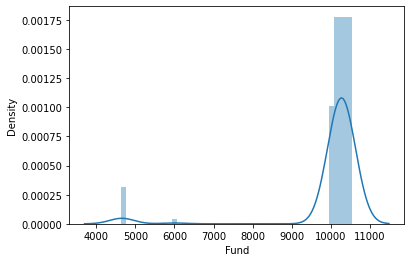

In [57]:
sns.distplot(df['Fund'])